In [1]:
### K-Means algorithm in color compression
# Colors compression in images using clustering algorithms.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

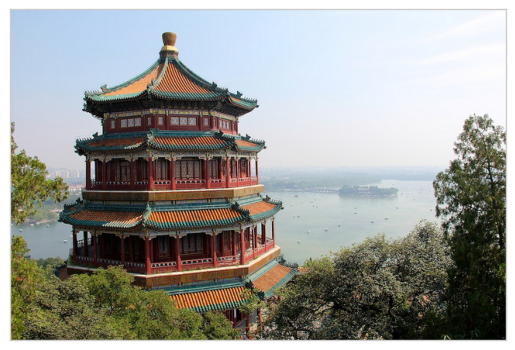

In [3]:
# import photo from SciKit-Learn dataset and photo display
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [4]:
print(china.shape)

(427, 640, 3)


In [5]:
# Scaling to values from 0 to 1
data = china / 255.0
data = data.reshape(-1,3)
print(data.shape)

(273280, 3)


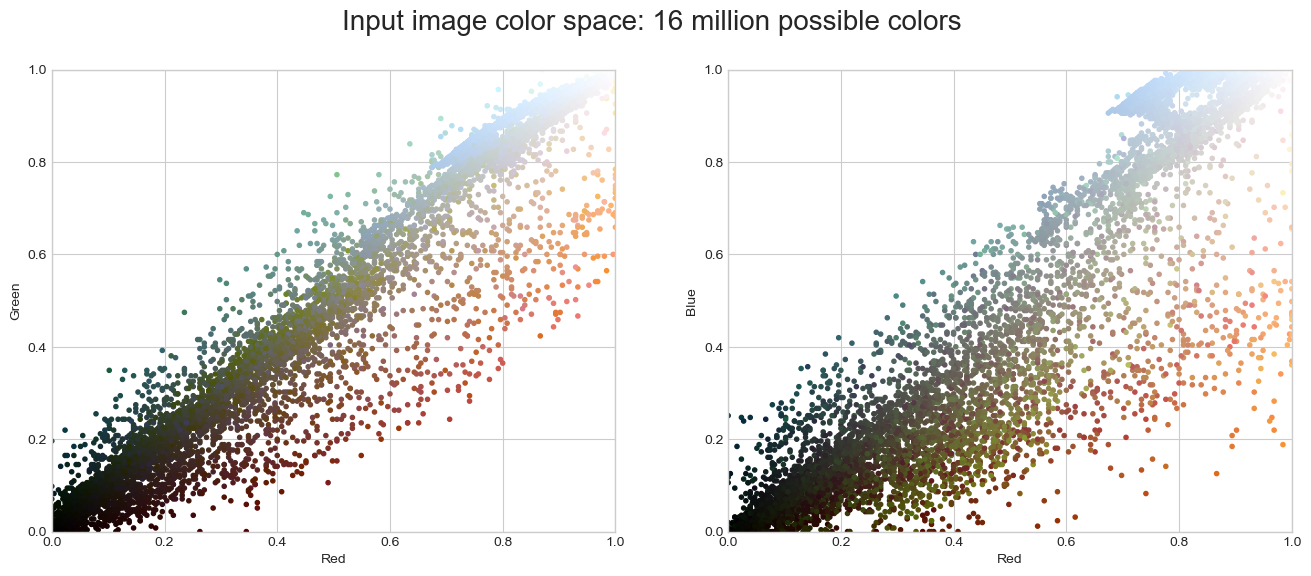

In [6]:
# Pixels in color space
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

        # selecting a random subset
    rng = np.random.default_rng(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    # visualization
    fig, ax = plt.subplots(1,2, figsize=(16,6))
    ax[0].scatter(R, G, color = colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))

    ax[1].scatter(R, B, color = colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0,1), ylim=(0,1))

    fig.suptitle(title, size=20)

plot_pixels(data, title="Input image color space: 16 million possible colors")

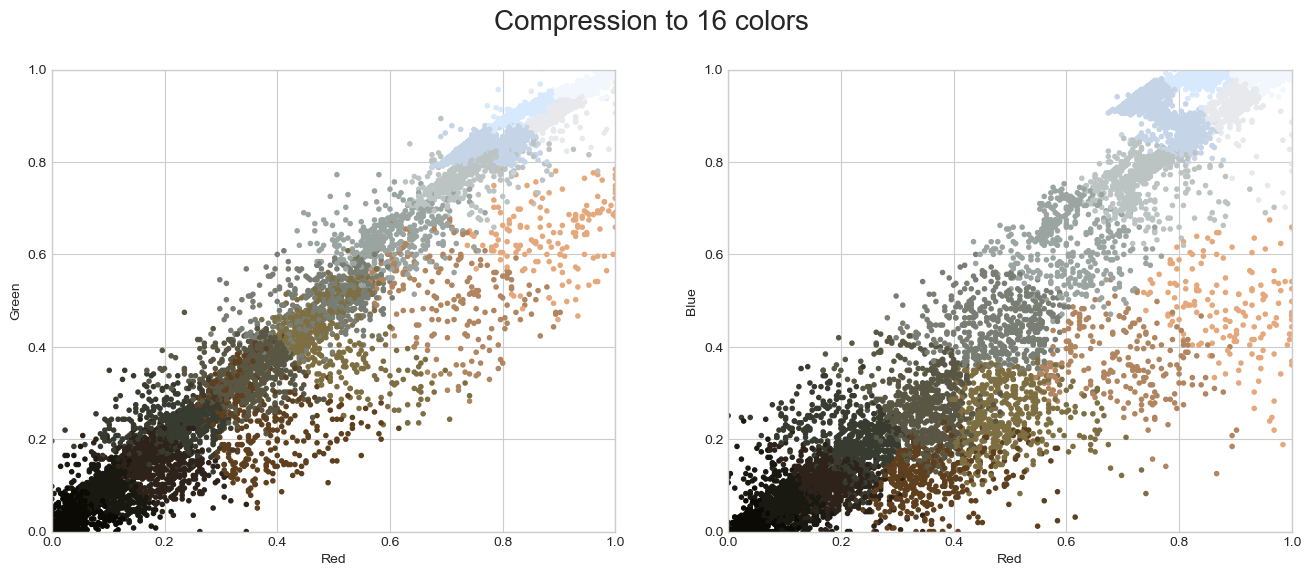

In [7]:
# Color compression from 16 million to 16 using clustering algorithms (K-Means)
# For faster operation, I will use the mini-batch method for the K-Means algorithm.
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16) #number of clusters
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, title="Compression to 16 colors", colors=new_colors)

In [8]:
## Effect: the colors of the original pixels have been changed.
## After clustering, each pixel was assigned the color closest to it.

(427, 640, 3)


Text(0.5, 1.0, '16-colors image')

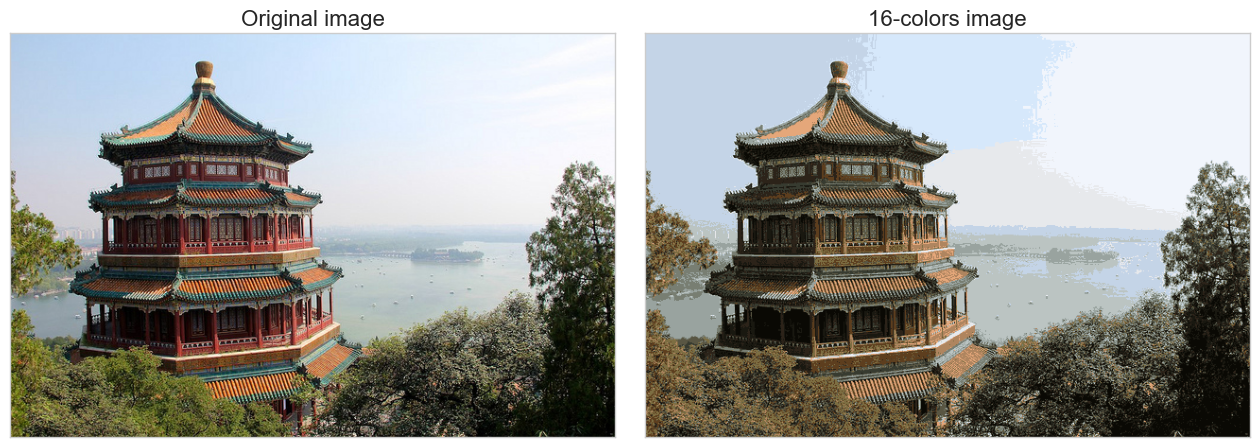

In [9]:
# Visualization of an image in a new, compressed pixel space 
china_recolored = new_colors.reshape(china.shape)
print(china_recolored.shape)

fig, ax = plt.subplots(1,2, figsize=(16,6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-colors image', size=16)